In [1]:
print('Choose whether to display code or not.')
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').show();
 } else {
 $('div.input').hide();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code?"></form>''')

In [2]:
#import packages
#load packages
import os
from tabulate import tabulate  # Used to display text-based tables.
import pandas as pd
import numpy as np
import math
from matplotlib.pylab import plt
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import MNLogit
from sklearn import metrics
import statsmodels.api as sm
from tabulate import tabulate
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# The important Kallysto imports.
from kallysto.publication import Publication
from kallysto.export import Export
from kallysto.formatter import Latex, Markdown
import kallysto.markdown

#williams correction from same folder
from williams_correction import williams_correction

In [3]:
#set working directory to top level project folder
os.chdir("..")
os.getcwd()

'/Users/mollyq/Documents/GitHub/Control_and_Valence_in_Unexpected_Events'

# Pilot Test Design

In which we run 20 participants on 4 material sets of 8 materials each in such a way:

In [4]:
pilot_material_subsets = pd.DataFrame.from_dict(
    {'Subset 1': {0: 'bill_holiday', 1: 'john_party'},
     
     'Subset 2': {0: 'rebecca_swimming', 1: 'sally_wine'},
     
     'Subset 3': {0: 'lucy_loan', 1: 'belinda_meeting'},
     
     'Subset 4': {0: 'sean_call', 1: 'michael_tea'}
    }
)

#Print for report.
string = "Pilot Test Methods"
print(string.center(100))
print()
print("""Latin Square Design: 8 Materials x 2 Control (Present/Absent) x 2 Valence (Positive/Negative)""")
print("""The 8 materials are divided into four subsets of 2 materials each deliberately chosen to divide
materials with similar themes such as shopping or travelling equally into each subset.""")
print(tabulate(pilot_material_subsets, headers="keys", tablefmt='fancy_grid'))
print()
print("""The material subsets were then assigned to four different condition combinations by Control (Means 
Present, Absent) and by Valence (Positive/Negative).""")
# print(tabulate(condition_assignments, headers="keys", tablefmt='fancy_grid'))
# print()
print("""Four material sets will be created. Each material set will be presented to a separate group of 5 participants.
No participant will see a material in more than one condition. Materials will be presented in a random order.""")


                                         Pilot Test Methods                                         

Latin Square Design: 8 Materials x 2 Control (Present/Absent) x 2 Valence (Positive/Negative)
The 8 materials are divided into four subsets of 2 materials each deliberately chosen to divide
materials with similar themes such as shopping or travelling equally into each subset.
╒════╤══════════════╤══════════════════╤═════════════════╤═════════════╕
│    │ Subset 1     │ Subset 2         │ Subset 3        │ Subset 4    │
╞════╪══════════════╪══════════════════╪═════════════════╪═════════════╡
│  0 │ bill_holiday │ rebecca_swimming │ lucy_loan       │ sean_call   │
├────┼──────────────┼──────────────────┼─────────────────┼─────────────┤
│  1 │ john_party   │ sally_wine       │ belinda_meeting │ michael_tea │
╘════╧══════════════╧══════════════════╧═════════════════╧═════════════╛

The material subsets were then assigned to four different condition combinations by Control (Means 
Present, 

# Pilot Test Survey Data to Ratings Files

## load in data and reformat

In [5]:
# read in the files with the material sets defined by the latin squares above
pilot_test_path = '0_data/2_pilot_test_data/1_annotated_data/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_data_files = os.listdir(pilot_test_path)

#check
print(list_of_data_files)


['20200630085751-SurveyExport.csv', '.DS_Store', 'explanation.txt', '20200629094753-SurveyExport.csv', '20200629070746-SurveyExport.csv', '20200630064835-SurveyExport.csv']


In [6]:
#select only .csv files
csv_list = [] #to keep file names
dict_of_files = {} #to keep dataframes

for filename in list_of_data_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_files[filename] = pd.read_csv(pilot_test_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

This is not a .csv file and will be discarded:  .DS_Store
This is not a .csv file and will be discarded:  explanation.txt


In [7]:
#dict_of_files['20200630085751-SurveyExport.csv']

In [8]:
#dict_of_files['20200630085751-SurveyExport.csv'].columns

In [9]:
for dataframe in dict_of_files:
    dict_of_files[dataframe] = dict_of_files[dataframe].melt(
                 id_vars = ['cond', 'Response ID', 'Time Started', 'Date Submitted', 'Status',
                           'Contact ID', 'Legacy Comments', 'Comments', 'Language', 'Referer', 'user_id','reject'
                           ]
                )

In [10]:
#dict_of_files['20200630085751-SurveyExport.csv']

In [11]:
for dataframe in dict_of_files:
    new = dict_of_files[dataframe]['variable'].str.split(".", expand = True) 
    # making separate first name column from new data frame 
    dict_of_files[dataframe]["material"]= new[0] 

    # making separate last name column from new data frame 
    dict_of_files[dataframe]["variable_condition"]= new[1] 


In [12]:
#dict_of_files['20200630085751-SurveyExport.csv']

In [13]:
# read in the files with the material sets defined by the latin squares above
material_sets_path = '0_data/0_material_sets/pilot_test_material_sets/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_materials_files = os.listdir(material_sets_path)

In [14]:
csv_list_materials = [] #to keep file names
dict_of_materials_files = {} #to keep dataframes

for filename in list_of_materials_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list_materials.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_materials_files[filename] = pd.read_csv(material_sets_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

This is not a .csv file and will be discarded:  material_set_4.xlsx
This is not a .csv file and will be discarded:  .DS_Store
This is not a .csv file and will be discarded:  material_set_3.xlsx
This is not a .csv file and will be discarded:  material_set_2.xlsx
This is not a .csv file and will be discarded:  material_set_1.xlsx


In [15]:
materials_info = pd.concat(dict_of_materials_files.values(), axis = 0, ignore_index=True, sort = False)
#materials_info

In [16]:
for dataframe in dict_of_files:
    for material_file in dict_of_materials_files:
        material_LG = material_file.split('_')
        if dict_of_files[dataframe]['cond'][0] in material_LG[1]:
            dict_of_files[dataframe] = pd.merge(dict_of_materials_files[material_file], 
                                                dict_of_files[dataframe], 
                                                on = 'material')

In [17]:
pilot_test_data_to_label = pd.concat(dict_of_files.values(), axis = 0, ignore_index=True, sort = False)

## Save to multiple files by material:

In [18]:
# for material in pilot_test_data_to_label['material'].unique():
#     pilot_test_data_to_label[(pilot_test_data_to_label['material'] == material) & 
#                              (pilot_test_data_to_label['reject'] == 'keep')  & 
#                              (pilot_test_data_to_label['variable_condition'] != 'q1')
#                             ].to_csv('Data/pilot_test_data/to_label/' + str(material) + '_to_label.csv')

# Pilot Test Data Analysis

## Read in Pilot Test Data

In [19]:
# read in the files with the material sets defined by the latin squares above
pilot_test_path = '2_pipeline/1_pilot_test/1_MQ_labels/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_data_files = os.listdir(pilot_test_path)

#check
print(list_of_data_files)


['michael_breakfast_mq.xlsx', 'lucy_loan_ mq.csv', 'sally_wine_mq.xlsx', 'rebecca_swimming_mq.xlsx', 'john_party_mq.xlsx', 'sean_call_mq.csv', 'MQ_ratings.txt', 'sally_wine_mq.csv', 'lucy_loan_ mq.xlsx', 'sean_call_mq.xlsx', 'bill_holiday_mq.xlsx', 'michael_breakfast_mq.csv', 'belinda_meeting_mq.csv', 'bill_holiday_mq.csv', 'belinda_meeting_mq.xlsx', 'rebecca_swimming_mq.csv', 'john_party_mq.csv']


In [20]:
#select only .csv files
csv_list = [] #to keep file names
dict_of_files = {} #to keep dataframes

for filename in list_of_data_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_files[filename] = pd.read_csv(pilot_test_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

#check
#print('\n', csv_list, '\n')
dict_of_files['sally_wine_mq.csv'].columns

This is not a .csv file and will be discarded:  michael_breakfast_mq.xlsx
This is not a .csv file and will be discarded:  sally_wine_mq.xlsx
This is not a .csv file and will be discarded:  rebecca_swimming_mq.xlsx
This is not a .csv file and will be discarded:  john_party_mq.xlsx
This is not a .csv file and will be discarded:  MQ_ratings.txt
This is not a .csv file and will be discarded:  lucy_loan_ mq.xlsx
This is not a .csv file and will be discarded:  sean_call_mq.xlsx
This is not a .csv file and will be discarded:  bill_holiday_mq.xlsx
This is not a .csv file and will be discarded:  belinda_meeting_mq.xlsx


Index(['random', 'subset', 'material', 'condition_code', 'valence_condition',
       'means_condition', 'goal_step', 'action_step', 'resources_step',
       'numeric_valence', 'numeric_control', 'numeric_valence_strength',
       'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
       'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
       'Language', 'Referer', 'SessionID', 'user_id', 'reject', 'variable',
       'answer_text', 'sw_neg_ans1', 'sw_neg_ans2', 'sw_neg_ans3',
       'sw_neg_ans4', 'sw_neg_ans5', 'sw_neg_ans6', 'sw_neg_ans7',
       'sw_neg_ans8', 'sw_other', 'sw_pos_ans1', 'sw_pos_ans2', 'sw_pos_ans3',
       'sw_pos_ans4', 'sw_pos_ans5', 'neg', 'pos', 'neither', 'goal',
       'non_goal', 'controllable', 'uncontrollable', 'neither_control'],
      dtype='object')

In [21]:
# where variable = ['non_goal_object','goal_object','both_objects','neither_object'], make new column "best_obj"
# then, where variable = ['pos','neg','neither'], make new column, "best_senti"
# when all moved over, change "variable" to "best_ans"
new_dict_of_files = dict()

for dataframe in dict_of_files:
    temp_df_ans = pd.DataFrame()
    temp_df_senti = pd.DataFrame()
    temp_df_obj = pd.DataFrame()
    
    temp_df_ans = dict_of_files[dataframe].melt(
                 id_vars = ['random', 'subset', 'material', 'condition_code', 'valence_condition',
                            'means_condition', 'goal_step', 'action_step', 'resources_step',
                            'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                            'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                            'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                            'Language', 'Referer', 'SessionID',
                            'user_id', 'reject', 'variable', 'answer_text'
                           ],
                 var_name = 'best_ans',
                 value_vars = dict_of_files[dataframe].columns.difference(['random', 'subset', 'material', 'condition_code', 'valence_condition',
                                                    'means_condition', 'goal_step', 'action_step', 'resources_step',
                                                    'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                                                    'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                                                    'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                                                    'Language', 'Referer', 'SessionID', 
                                                    'user_id', 'reject', 'variable', 'answer_text',
                                                    'neg', 'pos', 'neither',
                                                    'goal', 'non_goal', 
                                                    'controllable', 'uncontrollable','neither_control'
                                                                          ])
    )
    
    temp_df_senti = dict_of_files[dataframe].melt(
                 id_vars = ['random', 'subset', 'material', 'condition_code', 'valence_condition',
                            'means_condition', 'goal_step', 'action_step', 'resources_step',
                            'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                            'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                            'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                            'Language', 'Referer', 'SessionID',
                            'user_id', 'reject', 'variable', 'answer_text'
                           ],
                 var_name = 'best_senti',
                 value_vars=['neg','pos','neither']
    )


    temp_df_obj = dict_of_files[dataframe].melt(
                 id_vars = ['random', 'subset', 'material', 'condition_code', 'valence_condition',
                            'means_condition', 'goal_step', 'action_step', 'resources_step',
                            'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                            'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                            'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                            'Language', 'Referer', 'SessionID',
                            'user_id', 'reject', 'variable', 'answer_text'
                           ],
                 var_name = 'best_obj',
                 value_vars=[ 'goal', 'non_goal']
    )
    
    temp_df_control = dict_of_files[dataframe].melt(
                 id_vars = ['random', 'subset', 'material', 'condition_code', 'valence_condition',
                            'means_condition', 'goal_step', 'action_step', 'resources_step',
                            'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                            'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                            'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                            'Language', 'Referer', 'SessionID',
                            'user_id', 'reject', 'variable', 'answer_text'
                           ],
                 var_name = 'best_control',
                 value_vars=['controllable', 'uncontrollable','neither_control']
    )
    
    
    new_dict_of_files[dataframe] = temp_df_ans[temp_df_ans['value']==1].merge(
        temp_df_senti[temp_df_senti['value']==1].merge(
            temp_df_obj[temp_df_obj['value']==1].merge(
                temp_df_control[temp_df_control['value']==1]
            )
        )
    )

    
#new_dict_of_files['sally_wine_mq.csv'].head()

In [22]:
pilot_master_data = pd.concat(new_dict_of_files.values(), axis = 0, ignore_index=True)
pilot_master_data

,random,subset,material,condition_code,valence_condition,means_condition,goal_step,action_step,resources_step,numeric_valence,...,SessionID,user_id,reject,variable,answer_text,best_ans,value,best_senti,best_obj,best_control
0,0.466593,3,lucy_loan,B,negative,absent,Lucy hates her old car and wants to buy a new ...,Lucy calls the bank to get a loan for a new car.,The car dealer says her old car is a wreck and...,3.125000,...,1593509195_5efb054bad2ce6.48278228,5e5ce3bf1377484b52ea2c07,keep,lucy_loan,Lucy did not get approved for the bank loan to...,ll_neg_ans1,1.0,neg,goal,uncontrollable
1,0.263349,3,lucy_loan,C,positive,present,Lucy hates her old car and wants to buy a new ...,Lucy calls the bank to get a loan for a new car.,The car dealer says her old car is a classic a...,6.125000,...,1593514075_5efb185b572dd5.32957800,5a69175331b87a0001c76149,keep,lucy_loan,the car gets stolen before she is able to sell...,ll_other,1.0,neg,goal,uncontrollable
2,0.772094,3,lucy_loan,B,negative,absent,Lucy hates her old car and wants to buy a new ...,Lucy calls the bank to get a loan for a new car.,The car dealer says her old car is a wreck and...,3.125000,...,1593509432_5efb0638d3c924.78352224,59d4943b719adb0001235b5f,keep,lucy_loan,she gets a bargin on a new car,ll_other,1.0,pos,goal,uncontrollable
3,0.206239,3,lucy_loan,C,positive,present,Lucy hates her old car and wants to buy a new ...,Lucy calls the bank to get a loan for a new car.,The car dealer says her old car is a classic a...,6.125000,...,1593517792_5efb26e0d480c6.12954054,5ed6a937eb466b1029493c39,keep,lucy_loan,As she is about to go through with selling her...,ll_other,1.0,pos,goal,controllable
4,0.831202,3,lucy_loan,C,positive,present,Lucy hates her old car and wants to buy a new ...,Lucy calls the bank to get a loan for a new car.,The car dealer says her old car is a classic a...,6.125000,...,1593513925_5efb17c556d299.77092801,5d53b4a9312e7e000130d873,keep,lucy_loan,Her old car is worth more money than she thought,ll_other,1.0,pos,goal,uncontrollable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.097643,1,john_party,B,negative,absent,John comes home early from work because himsel...,"After arriving home, he takes off his coat and...","John cannot find the peeler, but starts to pre...",3.125000,...,1593430004_5ef9cff44b6486.28514032,5decfba65b56133beed6ec21,keep,john_party,John could not find the potatoe peeler.,jp_other,1.0,neg,goal,uncontrollable
155,0.942333,1,john_party,A,negative,present,John comes home early from work because himsel...,"After arriving home, he takes off his coat and...",John finds the peeler and starts to prepare th...,3.466667,...,1593427509_5ef9c6357bbc53.13824872,5d59a10aa17f570017307126,keep,john_party,The friends who were coming to the party cance...,jp_pos_ans3,1.0,neither,goal,neither_control
156,0.350107,1,john_party,A,negative,present,John comes home early from work because himsel...,"After arriving home, he takes off his coat and...",John finds the peeler and starts to prepare th...,3.466667,...,1593427412_5ef9c5d4aa5963.30852795,5e2b82843d8aa11d69c1bb2c,keep,john_party,The guests think the potatoes are the best the...,jp_pos_ans6,1.0,pos,goal,uncontrollable
157,0.932679,1,john_party,B,negative,absent,John comes home early from work because himsel...,"After arriving home, he takes off his coat and...","John cannot find the peeler, but starts to pre...",3.125000,...,1593430579_5ef9d233707839.74973788,5e1c4deffd004243d235909a,keep,john_party,His potatos are the favourite part of the meal...,jp_pos_ans6,1.0,pos,goal,uncontrollable


## Count and visualize the Spread of Answers

### Overall Frequencies/Proportions

In [23]:
control_order = ['controllable','uncontrollable','neither_control']

# #Make a graph
# pilot_master_data.groupby(['means_condition'])['best_control'].value_counts().unstack(0).loc[control_order].plot.bar()
# plt.xlabel("Material Means Condition")
# plt.ylabel("Frequency of Outcomes")

# #print the data
# pd.crosstab(pilot_master_data['means_condition'], pilot_master_data['best_control']).reindex(control_order, axis="columns")

In [24]:
pilot_prop_control = pilot_master_data.groupby(['means_condition'])['best_control'].value_counts().unstack(1)

pilot_prop_control["total"] = pilot_prop_control.sum(axis = 1)
pilot_prop_control["controllable_proportion"] = pilot_prop_control["controllable"]/pilot_prop_control["total"]
pilot_prop_control["uncontrollable_proportion"] = pilot_prop_control["uncontrollable"]/pilot_prop_control["total"]
pilot_prop_control["neither_control_proportion"] = pilot_prop_control["neither_control"]/pilot_prop_control["total"]
pilot_prop_control

best_control,controllable,neither_control,uncontrollable,total,controllable_proportion,uncontrollable_proportion,neither_control_proportion
means_condition,,,,,,,
absent,19,9,51,79,0.240506,0.64557,0.113924
present,21,8,51,80,0.262500,0.63750,0.100000


Text(0, 0.5, 'Proportion of Outcomes')

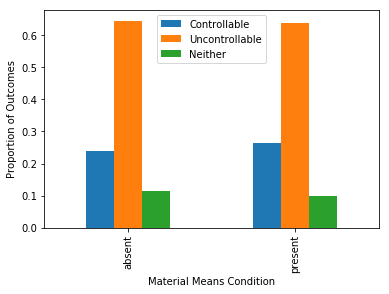

In [25]:
#Make a graph
pilot_prop_control[['controllable_proportion','uncontrollable_proportion','neither_control_proportion'
                   ]].plot.bar().legend(["Controllable", "Uncontrollable", "Neither"],loc='upper center'
)
plt.xlabel("Material Means Condition")
plt.ylabel("Proportion of Outcomes")

Whether the means are present or absent, participants provide outcomes that are largely (~64%) uncontrollable. Only about 25% of outcome responses were labelled controllable, and only 10% were considered neither controllable nor uncontrollable or some mix of the two.

In [26]:
valence_order = ['pos','neg','neither']

# #Make a graph
# pilot_master_data.groupby(['valence_condition'])['best_senti'].value_counts().unstack(0).loc[valence_order].plot.bar()
# plt.xlabel("Material Valence")
# plt.ylabel("Frequency of Outcomes")

# #print the data
# pd.crosstab(pilot_master_data['valence_condition'], pilot_master_data['best_senti']).reindex(valence_order, axis="columns")


In [27]:
pilot_prop_valence = pilot_master_data.groupby(['valence_condition'])['best_senti'].value_counts().unstack(1)

pilot_prop_valence["total"] = pilot_prop_valence.sum(axis = 1)
pilot_prop_valence["pos_proportion"] = pilot_prop_valence["pos"]/pilot_prop_valence["total"]
pilot_prop_valence["neg_proportion"] = pilot_prop_valence["neg"]/pilot_prop_valence["total"]
pilot_prop_valence["neither_proportion"] = pilot_prop_valence["neither"]/pilot_prop_valence["total"]
pilot_prop_valence

best_senti,neg,neither,pos,total,pos_proportion,neg_proportion,neither_proportion
valence_condition,,,,,,,
negative,45,13,21,79,0.265823,0.56962,0.164557
positive,40,11,29,80,0.362500,0.50000,0.137500


Text(0, 0.5, 'Proportion of Outcomes')

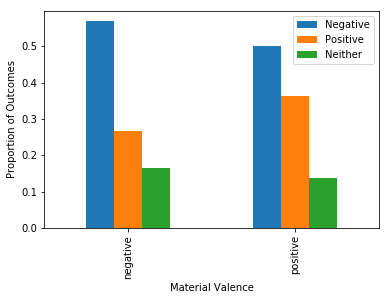

In [28]:
#Make a graph
pilot_prop_valence[['neg_proportion','pos_proportion','neither_proportion'
                   ]].plot.bar().legend(["Negative", "Positive", "Neither"],loc='upper right'
)
plt.xlabel("Material Valence")
plt.ylabel("Proportion of Outcomes")

Contrary to our prior work, the valence of responses was largely negative, regardless of material valence. When negative materials were presented, outcomes were 57% negative and 27% positive; when positive materials were presented, outcomes were 50% negative and 36% positive. 

In the valence study, we saw a flipping effect where outcome responses to positive materials were majority (72%) negative and 24% positive; and outcome responses to negative materials had a smaller proportion (56%) of negative outcomes and more positives (40%), respectively. Here, we see almost an opposite effect.

### Now, split by both conditions

In [29]:
# pilot_master_data.groupby(['means_condition','valence_condition'])['best_senti'].value_counts().unstack(
#     [0,1]).loc[valence_order].plot.bar(
#     figsize = (12,7),
# title="Outcome Valence by Material Valence Condition and Means Condition").legend(["Negative - Means Absent",
#                                                                                    "Positive - Means Absent",
#                                                                                    "Negative - Means Present",
#                                                                                    "Positive - Means Present"],
#                                                                                  title = "Valence - Means Condition")
# plt.xlabel("Outcome Valence") 
# plt.ylabel("Frequency of Outcomes")


# #print the data
# pilot_master_data.groupby(['valence_condition', 'means_condition'])['best_senti'].value_counts().unstack([2])

best_senti                         neg  neither  pos
valence_condition means_condition                   
negative          absent            19        6   14
                  present           26        7    7
positive          absent            17        7   16
                  present           23        4   13

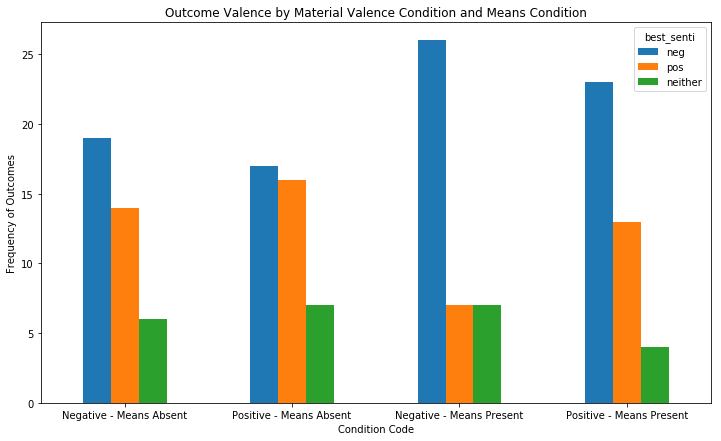

In [30]:
plot_valence_by_cond = pilot_master_data.groupby(['condition_code'])['best_senti'].value_counts().unstack(
    [1]).reset_index()
index = ["Negative - Means Present",
         "Negative - Means Absent",
         "Positive - Means Present",
         "Positive - Means Absent"]
plot_valence_by_cond['condition_code'] = index
plot_valence_by_cond = plot_valence_by_cond.set_index('condition_code')

condition_order = ["Negative - Means Absent",
                   "Positive - Means Absent",
                   "Negative - Means Present",
                   "Positive - Means Present",]

plot_valence_by_cond[["neg", "pos", "neither"]].loc[condition_order].plot.bar(figsize = (12,7),
                              title="Outcome Valence by Material Valence Condition and Means Condition")
plt.xlabel("Condition Code") 
plt.ylabel("Frequency of Outcomes")

plt.xticks(rotation=0)

# #print the data
pilot_master_data.groupby(['valence_condition', 'means_condition'])['best_senti'].value_counts().unstack([2])

In [31]:
plot_valence_by_cond = pilot_master_data.groupby(
                                                    ['valence_condition', 'means_condition']
                                                )['best_senti'].value_counts().unstack().reset_index()


# index = ["Negative - Means Present",
#          "Negative - Means Absent",
#          "Positive - Means Present",
#          "Positive - Means Absent"]

# plot_valence_by_cond['condition_code'] = index

# plot_valence_by_cond = plot_valence_by_cond.set_index('condition_code')

plot_valence_by_cond

best_senti,valence_condition,means_condition,neg,neither,pos
0,negative,absent,19,6,14
1,negative,present,26,7,7
2,positive,absent,17,7,16
3,positive,present,23,4,13


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 9 Text xticklabel objects>)

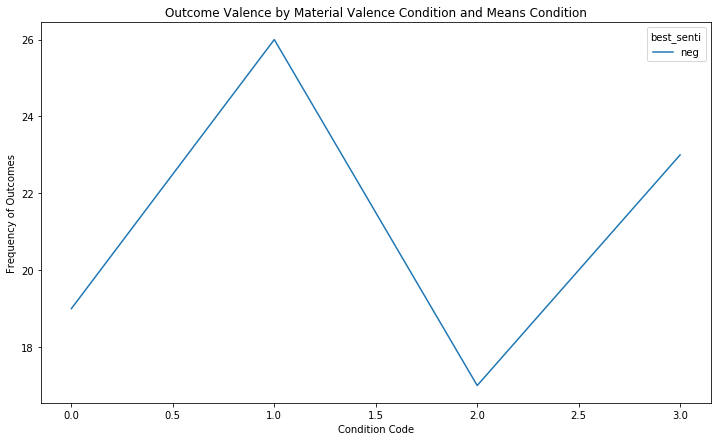

In [32]:
condition_order = ["Negative - Means Absent",
                   "Positive - Means Absent",
                   "Negative - Means Present",
                   "Positive - Means Present"]

plot_valence_by_cond[["neg"]].plot.line(figsize = (12,7),
                              title="Outcome Valence by Material Valence Condition and Means Condition")
plt.xlabel("Condition Code") 
plt.ylabel("Frequency of Outcomes")

plt.xticks(rotation=0)

# #print the data
# pilot_master_data.groupby(['valence_condition', 'means_condition'])['best_senti'].value_counts().unstack([2])

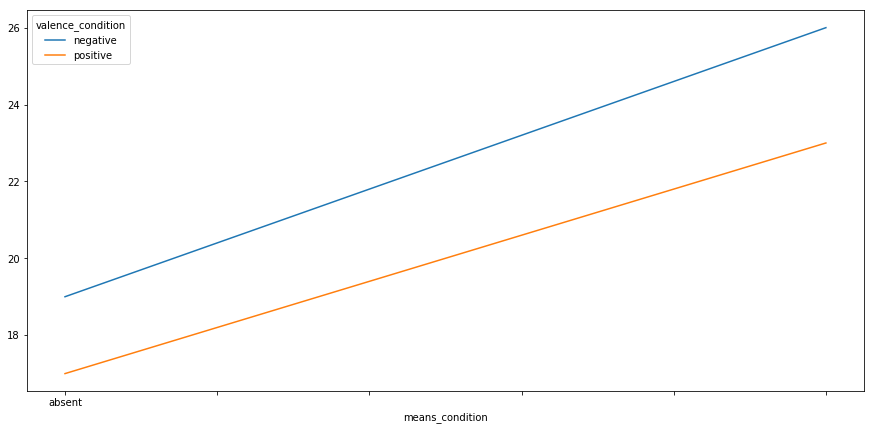

In [33]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
pilot_master_data[pilot_master_data['best_senti']=='neg'].groupby(['means_condition', 'valence_condition']).count()['best_senti'].unstack().plot(ax=ax)

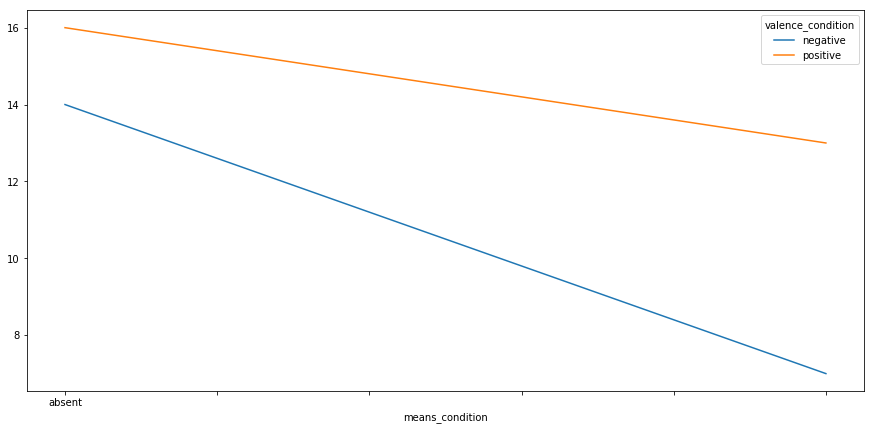

In [34]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
pilot_master_data[pilot_master_data['best_senti']=='pos'].groupby(['means_condition', 'valence_condition']).count()['best_senti'].unstack().plot(ax=ax)

Negative and Means Absent Materials received more (49%) negative outcome responses, but also a relatively high number (36%) of positive responses as well, most closely mirroring the Valence Study.
Likewise, Positive and Means Present Materials received mostly (58%) negative outcome responses, and fewer (33%) positive outcome responses, again, closely mirroring the Valence Study.

Negative Means Present Materials received a much larger number of negative outcome responses compared to positive (65% negative; 18% positive).
Positive Means Absent Materials were more evenly distributed (43% negative; 40% positive).


This may mean that it is Controllability rather than Valence that explains the variance seen in the Valence Study.
When Means are Absent, positive and negative outcome responses are more even whether the material is Positive (43% and 40%, respectively) or if the material is negative (49% and 36%, respectively).

It is when the Means are Present that outcome responses are weighted most heavily toward the negative, whether the material is Positive (58% negative outcomes) or the material is Negative (65% negative). This effect is strongest for the Negative Means Present materials (65% negative, 18% positive).

In [35]:
pilot_prop_valencexcontrol = pilot_master_data.groupby(['means_condition'])['best_senti'].value_counts().unstack(1)

pilot_prop_valencexcontrol["total"] = pilot_prop_valencexcontrol.sum(axis = 1)
pilot_prop_valencexcontrol["pos_proportion"] = pilot_prop_valencexcontrol["pos"]/pilot_prop_valencexcontrol["total"]
pilot_prop_valencexcontrol["neg_proportion"] = pilot_prop_valencexcontrol["neg"]/pilot_prop_valencexcontrol["total"]
pilot_prop_valencexcontrol["neither_proportion"] = pilot_prop_valencexcontrol["neither"]/pilot_prop_valencexcontrol["total"]
pilot_prop_valencexcontrol

best_senti,neg,neither,pos,total,pos_proportion,neg_proportion,neither_proportion
means_condition,,,,,,,
absent,36,13,30,79,0.379747,0.455696,0.164557
present,49,11,20,80,0.250000,0.612500,0.137500


Text(0, 0.5, 'Proportion of Outcomes')

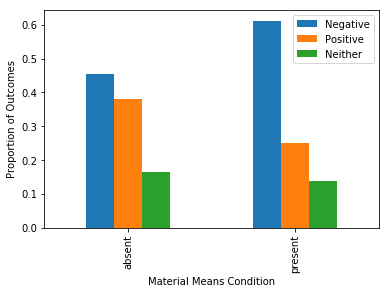

In [36]:
#Make a graph
pilot_prop_valencexcontrol[['neg_proportion','pos_proportion','neither_proportion'
                   ]].plot.bar().legend(["Negative", "Positive", "Neither"],loc='upper right'
)
plt.xlabel("Material Means Condition")
plt.ylabel("Proportion of Outcomes")

**Indeed, when we split materials by Means Condition, we see that Outcome Valence is largely dependent on Material Controllability.**

In [37]:
newf = pilot_master_data.groupby(['condition_code'])['best_senti'].value_counts().unstack([1])
newf

best_senti,neg,neither,pos
condition_code,,,
A,26,7,7
B,19,6,14
C,23,4,13
D,17,7,16


In [38]:
all_2_values = newf.values.tolist()
cond_2_list = newf.index.tolist()
name_2_list = []

print("Chi square of all conditions:")
print(tabulate(newf, headers="keys", tablefmt='fancy_grid'))
chiobs, pvalue, deffre, expt = chi2_contingency(newf)
#William's Correction
# as calculated in R's package: Tests, function: DescTools
## https://rdrr.io/cran/DescTools/src/R/Tests.r

n = sum(newf.sum())
nrows = newf.shape[0]#count of rows
ncols = newf.shape[1]#count of columns
williams_deffre = (nrows - 1)*(ncols -1)

# row_total = col_total = 0
# for i in range(nrows):
#     row_total = row_total + 1 / ( sum( new2f.iloc[i,:] )
#                                 ) 
# for j in range(ncols):
#     col_total = col_total + 1 / ( sum( new2f.iloc[:,j] )
#                                 ) 
#without loops:
row_total = sum(1/x for x in newf.sum(axis=0))
col_total = sum(1/x for x in newf.sum(axis=1))    

q = 1+ ( (n*row_total - 1) * (n*col_total - 1 ) ) / (6 * n * williams_deffre)

williams_correction = chiobs / q
williams_pvalue = chi2.sf(williams_correction, williams_deffre)

print("Unadjusted Chi-Square")
print("X^2 = ", chiobs)
print("degrees of freedom: ", deffre)
print("p = ", "{:.16f}".format(pvalue), '\n')

print("William's Corrected Chi-Square")
print("X^2 = ", williams_correction)
print("degrees of freedom: ", williams_deffre)
print("p = ", "{:.16f}".format(williams_pvalue), '\n')

Chi square of all conditions:
╒══════════════════╤═══════╤═══════════╤═══════╕
│ condition_code   │   neg │   neither │   pos │
╞══════════════════╪═══════╪═══════════╪═══════╡
│ A                │    26 │         7 │     7 │
├──────────────────┼───────┼───────────┼───────┤
│ B                │    19 │         6 │    14 │
├──────────────────┼───────┼───────────┼───────┤
│ C                │    23 │         4 │    13 │
├──────────────────┼───────┼───────────┼───────┤
│ D                │    17 │         7 │    16 │
╘══════════════════╧═══════╧═══════════╧═══════╛
Unadjusted Chi-Square
X^2 =  6.842575791855204
degrees of freedom:  6
p =  0.3356515044126955 

William's Corrected Chi-Square
X^2 =  6.656335214802248
degrees of freedom:  6
p =  0.3538010033562087 



In [39]:
all_values = newf.values.tolist()
cond_list = newf.index.tolist()
name_list = []
print(cond_list)
for cond1 in cond_list:
    for cond2 in cond_list:
        if cond1 != cond2:
            name_list.append(cond1 + ' by ' + cond2)  
for vals1 in all_values:
    for vals2 in all_values:
        if vals1 != vals2:
            print(name_list[0])
            del(name_list[0] )
            print(vals1)
            print(vals2)
            obs = np.array([vals1,vals2])
            chiobs, pvalue, deffre, expt = chi2_contingency(obs)
            print("X = ", chiobs)
            print("df = ", deffre)
            print("p =", "{:.16f}".format(float(pvalue)), '\n')

['A', 'B', 'C', 'D']
A by B
[26, 7, 7]
[19, 6, 14]
X =  3.4870458031996483
df =  2
p = 0.1749031474163910 

A by C
[26, 7, 7]
[23, 4, 13]
X =  2.8018552875695732
df =  2
p = 0.2463683158690369 

A by D
[26, 7, 7]
[17, 7, 16]
X =  5.405460060667341
df =  2
p = 0.0670222898671780 

B by A
[19, 6, 14]
[26, 7, 7]
X =  3.4870458031996483
df =  2
p = 0.1749031474163910 

B by C
[19, 6, 14]
[23, 4, 13]
X =  0.8054602496269168
df =  2
p = 0.6684924845156822 

B by D
[19, 6, 14]
[17, 7, 16]
X =  0.30875876616261266
df =  2
p = 0.8569468481970407 

C by A
[23, 4, 13]
[26, 7, 7]
X =  2.8018552875695732
df =  2
p = 0.2463683158690369 

C by B
[23, 4, 13]
[19, 6, 14]
X =  0.8054602496269168
df =  2
p = 0.6684924845156822 

C by D
[23, 4, 13]
[17, 7, 16]
X =  2.028526645768025
df =  2
p = 0.3626695017701405 

D by A
[17, 7, 16]
[26, 7, 7]
X =  5.405460060667341
df =  2
p = 0.0670222898671780 

D by B
[17, 7, 16]
[19, 6, 14]
X =  0.3087587661626127
df =  2
p = 0.8569468481970407 

D by C
[17, 7, 16]


Negative Means Present by Positive Means Absent is the only trend toward significance.

A (Negative - Means Present) by D (Positive - Means Absent)  
[26, 7, 7]  
[17, 7, 16]  
X =  5.405  
df =  2    
p = 0.067

In [40]:
newf2 = pilot_master_data.groupby(['means_condition'])['best_senti'].value_counts().unstack([1])
newf2

best_senti,neg,neither,pos
means_condition,,,
absent,36,13,30
present,49,11,20


In [41]:
all_values = newf2.values.tolist()
cond_list = newf2.index.tolist()
name_list = []
print(cond_list)
for cond1 in cond_list:
    for cond2 in cond_list:
        if cond1 != cond2:
            name_list.append(cond1 + ' by ' + cond2)  
for vals1 in all_values:
    for vals2 in all_values:
        if vals1 != vals2:
            print(name_list[0])
            del(name_list[0] )
            print(vals1)
            print(vals2)
            obs = np.array([vals1,vals2])
            chiobs, pvalue, deffre, expt = chi2_contingency(obs)
            print("X = ", chiobs)
            print("df = ", deffre)
            print("p =", "{:.16f}".format(float(pvalue)), '\n')

['absent', 'present']
absent by present
[36, 13, 30]
[49, 11, 20]
X =  4.148776759121371
df =  2
p = 0.1256332438593745 

present by absent
[49, 11, 20]
[36, 13, 30]
X =  4.148776759121371
df =  2
p = 0.1256332438593745 



In [42]:
newf3 = pilot_master_data.groupby(['valence_condition'])['best_senti'].value_counts().unstack([1])
newf3

best_senti,neg,neither,pos
valence_condition,,,
negative,45,13,21
positive,40,11,29


In [43]:
all_values = newf3.values.tolist()
cond_list = newf3.index.tolist()
name_list = []
print(cond_list)
for cond1 in cond_list:
    for cond2 in cond_list:
        if cond1 != cond2:
            name_list.append(cond1 + ' by ' + cond2)  
for vals1 in all_values:
    for vals2 in all_values:
        if vals1 != vals2:
            print(name_list[0])
            del(name_list[0] )
            print(vals1)
            print(vals2)
            obs = np.array([vals1,vals2])
            chiobs, pvalue, deffre, expt = chi2_contingency(obs)
            print("X = ", chiobs)
            print("df = ", deffre)
            print("p =", "{:.16f}".format(float(pvalue)), '\n')

['negative', 'positive']
negative by positive
[45, 13, 21]
[40, 11, 29]
X =  1.7345636169024568
df =  2
p = 0.4200918889368790 

positive by negative
[40, 11, 29]
[45, 13, 21]
X =  1.7345636169024572
df =  2
p = 0.4200918889368790 



(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

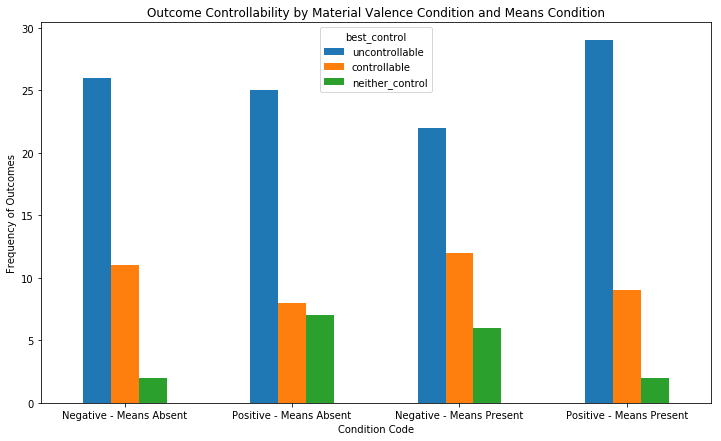

In [44]:
plot_valence_by_cond = pilot_master_data.groupby(['condition_code'])['best_control'].value_counts().unstack(
    [1]).reset_index()
index = ["Negative - Means Present",
         "Negative - Means Absent",
         "Positive - Means Present",
         "Positive - Means Absent"]
plot_valence_by_cond['condition_code'] = index
plot_valence_by_cond = plot_valence_by_cond.set_index('condition_code')

condition_order = ["Negative - Means Absent",
                   "Positive - Means Absent",
                   "Negative - Means Present",
                   "Positive - Means Present",]

plot_valence_by_cond[["uncontrollable", "controllable", "neither_control"]].loc[condition_order].plot.bar(figsize = (12,7),
                              title="Outcome Controllability by Material Valence Condition and Means Condition")
plt.xlabel("Condition Code") 
plt.ylabel("Frequency of Outcomes")

plt.xticks(rotation=0)

# #print the data
# pilot_master_data.groupby(['valence_condition', 'means_condition'])['best_senti'].value_counts().unstack([2])

When looking at Outcome Controllability, there does not appear to be much difference in response frequencies based on the material conditions.

All materials received more Uncontrollable than Controllable outcome responses.

Negative and Means Absent Materials received mostly (67%) uncontrollable outcome responses, and fewer (28%) controllable responses as well. Likewise, Positive and Means Present Materials received mostly (73%) uncontrollable outcome responses, and fewer (23%) controllable outcome responses.

Negative Means Present Materials received fewer, but still a majority of uncontrollable outcome responses (55% uncontrollable; 30% controllable). Positive Means Absent Materials also received a high proportion of uncontrollable (63% uncontrollable; 20% controllable).


In [45]:
pilot_prop_controlxvalence = pilot_master_data.groupby(['valence_condition'])['best_control'].value_counts().unstack(1)

pilot_prop_controlxvalence["total"] = pilot_prop_controlxvalence.sum(axis = 1)
pilot_prop_controlxvalence["controllable_proportion"] = pilot_prop_controlxvalence["controllable"]/pilot_prop_controlxvalence["total"]
pilot_prop_controlxvalence["uncontrollable_proportion"] = pilot_prop_controlxvalence["uncontrollable"]/pilot_prop_controlxvalence["total"]
pilot_prop_controlxvalence["neither_control_proportion"] = pilot_prop_controlxvalence["neither_control"]/pilot_prop_controlxvalence["total"]
pilot_prop_controlxvalence

best_control,controllable,neither_control,uncontrollable,total,controllable_proportion,uncontrollable_proportion,neither_control_proportion
valence_condition,,,,,,,
negative,23,8,48,79,0.291139,0.607595,0.101266
positive,17,9,54,80,0.212500,0.675000,0.112500


Text(0, 0.5, 'Proportion of Outcomes')

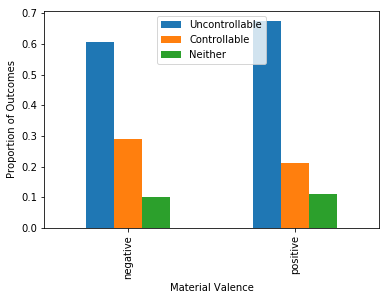

In [46]:
#Make a graph
pilot_prop_controlxvalence[['uncontrollable_proportion','controllable_proportion','neither_control_proportion'
                   ]].plot.bar().legend(["Uncontrollable", "Controllable", "Neither"],loc='upper center'
)
plt.xlabel("Material Valence")
plt.ylabel("Proportion of Outcomes")

**A split of outcome controllability by Valence condition shows the same.**

### Correlational

In [47]:
pilot_master_data.head(2)

,random,subset,material,condition_code,valence_condition,means_condition,goal_step,action_step,resources_step,numeric_valence,...,SessionID,user_id,reject,variable,answer_text,best_ans,value,best_senti,best_obj,best_control
0,0.466593,3,lucy_loan,B,negative,absent,Lucy hates her old car and wants to buy a new ...,Lucy calls the bank to get a loan for a new car.,The car dealer says her old car is a wreck and...,3.125,...,1593509195_5efb054bad2ce6.48278228,5e5ce3bf1377484b52ea2c07,keep,lucy_loan,Lucy did not get approved for the bank loan to...,ll_neg_ans1,1.0,neg,goal,uncontrollable
1,0.263349,3,lucy_loan,C,positive,present,Lucy hates her old car and wants to buy a new ...,Lucy calls the bank to get a loan for a new car.,The car dealer says her old car is a classic a...,6.125,...,1593514075_5efb185b572dd5.32957800,5a69175331b87a0001c76149,keep,lucy_loan,the car gets stolen before she is able to sell...,ll_other,1.0,neg,goal,uncontrollable


#### Where larger numbers are more positive and more controllable and smaller numbers are more negative and uncontrollable

In [48]:
# but first, I need to make numeric variables for the valence and controllability ratings.
numeric_ratings = [0,1,0.5]
#NaN so that neithers in between...

# pair the numbers with the ordered (text) ratings
numeric_valence_ratings = dict(zip(valence_order, numeric_ratings))
numeric_control_ratings = dict(zip(control_order, numeric_ratings))

#check
#print(numeric_valence_ratings)
#list(numeric_control_ratings)

pilot_master_data['outcome_numeric_valence'] = pilot_master_data['best_senti'].map(
    lambda x: numeric_valence_ratings[x] if x != -9999 else None
)

pilot_master_data['outcome_numeric_control'] = pilot_master_data['best_control'].map(
    lambda x: numeric_control_ratings[x] if x != -9999 else None
)

In [49]:
valence_order

['pos', 'neg', 'neither']

Text(0, 0.5, 'Proportion of Outcomes')

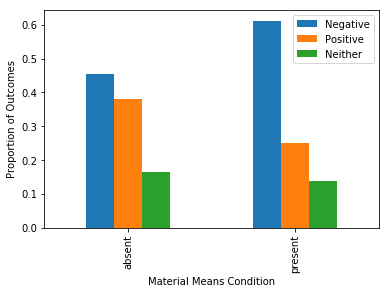

In [50]:
#Make a graph
pilot_prop_valencexcontrol[['neg_proportion','pos_proportion','neither_proportion'
                   ]].plot.bar().legend(["Negative", "Positive", "Neither"],loc='upper right'
)
plt.xlabel("Material Means Condition")
plt.ylabel("Proportion of Outcomes")

### Interaction Graph

In [51]:
interaction_data = pilot_master_data.groupby('condition_code')

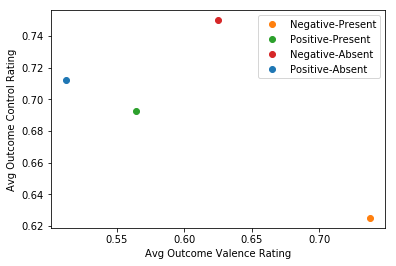

In [52]:
conditions = {'A':'Negative-Present', 'C':'Positive-Present', 'B':'Negative-Absent', 'D':'Positive-Absent'}    

fig, ax = plt.subplots()
ax.plot(interaction_data.get_group('A')["outcome_numeric_valence"].mean(), 
        interaction_data.get_group('A')["outcome_numeric_control"].mean(),  'tab:orange',
               marker="o", linestyle=""
       )
ax.plot(interaction_data.get_group('B')["outcome_numeric_valence"].mean(), 
        interaction_data.get_group('B')["outcome_numeric_control"].mean(),  'tab:green',
               marker="o", linestyle=""
       )
ax.plot(interaction_data.get_group('C')["outcome_numeric_valence"].mean(), 
        interaction_data.get_group('C')["outcome_numeric_control"].mean(),  'tab:red',
               marker="o", linestyle=""
       )
ax.plot(interaction_data.get_group('D')["outcome_numeric_valence"].mean(), 
        interaction_data.get_group('D')["outcome_numeric_control"].mean(),  'tab:blue',
               marker="o", linestyle=""
       )

ax.set(xlabel='Avg Outcome Valence Rating', ylabel='Avg Outcome Control Rating')
ax.legend(['Negative-Present','Positive-Present','Negative-Absent','Positive-Absent'])

plt.show()
